In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

dv001.ib.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/IPMI-2023


In [2]:
import sys, os
import numpy as np
import pandas as pd

sys.path.append('..')
%aimport mre_pinn

sys.path.append('../../param_search')
%aimport param_search
ps = param_search

Using backend: pytorch



# IPMI 2023 phantom experiment

In [3]:
%pwd

'/ocean/projects/asc170022p/mtragoza/mre-pinn/IPMI-2023'

In [6]:
# define the job template and name format

template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH --time=48:00:00
#SBATCH -o %J.stdout
#SBATCH -e %J.stderr
#SBATCH --mail-type=all

hostname
pwd
source activate MRE-PINN

python ../../../train.py \\
    --xarray_dir {xarray_dir} \\
    --example_id {example_id} \\
    --frequency {frequency} \\
    --omega {omega} \\
    --polar_input {polar_input} \\
    --pde_name {pde_name} \\
    --pde_warmup_iters 10000 \\
    --pde_step_iters 5000 \\
    --pde_step_factor 10 \\
    --pde_init_weight {pde_init_weight} \\
    --pde_loss_weight {pde_loss_weight} \\
    --save_prefix {job_name}    
'''
name = 'train_{data_name}_{example_id}_{pde_name}'

# define the parameter space

phantom_space = ps.ParamSpace(
    data_name='phantom',
    xarray_dir='../../../data/BIOQIC/phantom',
    example_id=[30, 40, 50, 60, 70, 80, 90, 100],
    frequency='auto',
    omega=30,
    pde_name=['helmholtz', 'hetero'],
    pde_init_weight=1e-12,
    pde_loss_weight=1e-10,
    polar_input=0,
)
phantom_space2 = ps.ParamSpace(
    data_name='phantom',
    xarray_dir='../../../data/BIOQIC/phantom',
    example_id=[30, 40, 50, 60, 70, 80, 90, 100],
    frequency='auto',
    omega=30,
    pde_name=['hetero2'],
    pde_init_weight=1e-12,
    pde_loss_weight=1e-10,
    polar_input=0,
)

param_space = phantom_space
len(param_space)

16

In [12]:
%autoreload
expt_name = '2022-11-23_phantom_init'
#expt_name = '2022-11-26_phantom_hetero2'

#jobs = ps.submit(template, name, param_space, work_dir=expt_name, verbose=True)
#jobs.to_csv(f'{expt_name}.jobs')

jobs = pd.read_csv(f'{expt_name}.jobs')

In [13]:
status_cols = ['job_name', 'job_state', 'node_id', 'runtime', 'stdout', 'stderr']
status = ps.status(jobs)[status_cols]
status

,job_name,job_state,node_id,runtime,stdout,stderr
job_id,,,,,,
13259284,train_phantom_30_helmholtz,NaN,NaN,NaN,v023.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
13259287,train_phantom_30_hetero,NaN,NaN,NaN,v024.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
13259288,train_phantom_40_helmholtz,NaN,NaN,NaN,v024.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
13259289,train_phantom_40_hetero,NaN,NaN,NaN,v024.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
13259290,train_phantom_50_helmholtz,NaN,NaN,NaN,v024.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
13259291,train_phantom_50_hetero,NaN,NaN,NaN,v007.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
13259292,train_phantom_60_helmholtz,NaN,NaN,NaN,v006.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
13259293,train_phantom_60_hetero,NaN,NaN,NaN,v006.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n
13259294,train_phantom_70_helmholtz,NaN,NaN,NaN,v006.ib.bridges2.psc.edu\n/ocean/projects/asc1...,Using backend: pytorch\n\n


In [14]:
print(status.iloc[0].stdout[-100:])

                         5                    NaN  ...  13959.696230

[30906 rows x 3 columns]
Done



In [15]:
metrics = ps.metrics(jobs)

# did all models train to 100k iterations?
assert (metrics.groupby('job_name')['iteration'].max() == 100e3).all()

# get the final test evaluations
metrics = metrics[metrics.iteration == 100e3]

param_cols = ['pde_name', 'example_id'] # experimental parameters
index_cols = ['variable_name', 'spatial_frequency_bin', 'spatial_region'] # metric identifiers
metric_cols = ['MSAV', 'PSD', 'MAV'] # metric values

metrics = metrics.groupby(param_cols + index_cols, sort=False)[metric_cols].mean()
metrics = metrics.unstack(level=[len(param_cols)])

def metric_map(t):
    metric_name, var_name = t
    new_col_name = f'{var_name}_{metric_name}'
    new_col_name = new_col_name.replace('diff_MSAV', 'pred_MSAE')
    new_col_name = new_col_name.replace('pde_diff_MSAV', 'PDE_MSAE')
    new_col_name = new_col_name.replace('diff_MAV', 'pred_MAD')
    return new_col_name

metrics.columns = [metric_map(t) for t in metrics.columns.to_flat_index()]
metrics

u_pred_MSAV  \
pde_name  example_id spatial_frequency_bin spatial_region                
helmholtz 30         all                   all                0.000028   
                                           0                       NaN   
                                           1                       NaN   
                                           2                       NaN   
                                           3                       NaN   
...                                                                ...   
hetero    100        6.0                   all                     NaN   
                     7.0                   all                     NaN   
                     8.0                   all                     NaN   
                     9.0                   all                     NaN   
                     10.0                  all                     NaN   

                                                            u_pred_MSAE  \
pde_name  example_id spatial_frequency_bin spatial_region                 
helmholtz 30         all                   all             2.536183e-07   
                                           0                        NaN   
                                           1                        NaN   
                                           2                        NaN   
                                           3                        NaN   
...                                                                 ...   
hetero    100        6.0                   all                      NaN   
                     7.0                   all                      NaN   
                     8.0                   all                      NaN   
                     9.0                   all                      NaN   
                     10.0                  all                      NaN   

                                                           u_true_MSAV  \
pde_name  example_id spatial_frequency_bin spatial_region                
helmholtz 30         all                   all                0.000028   
                                           0                       NaN   
                                           1                       NaN   
                                           2                       NaN   
                                           3                       NaN   
...                                                                ...   
hetero    100        6.0                   all                     NaN   
                     7.0                   all                     NaN   
                     8.0                   all                     NaN   
                     9.0                   all                     NaN   
                     10.0                  all                     NaN   

                                                           lu_pred_MSAV  \
pde_name  example_id spatial_frequency_bin spatial_region                 
helmholtz 30         all                   all             74377.205233   
                                           0                        NaN   
                                           1                        NaN   
                                           2                        NaN   
                                           3                        NaN   
...                                                                 ...   
hetero    100        6.0                   all                      NaN   
                     7.0                   all                      NaN   
                     8.0                   all                      NaN   
                     9.0                   all                      NaN   
                     10.0                  all                      NaN   

                                                            lu_pred_MSAE  \
pde_name  example_id spatial_frequency_bin spatial_region                  
helmholtz 30         all     

<IPython.core.display.Javascript object>


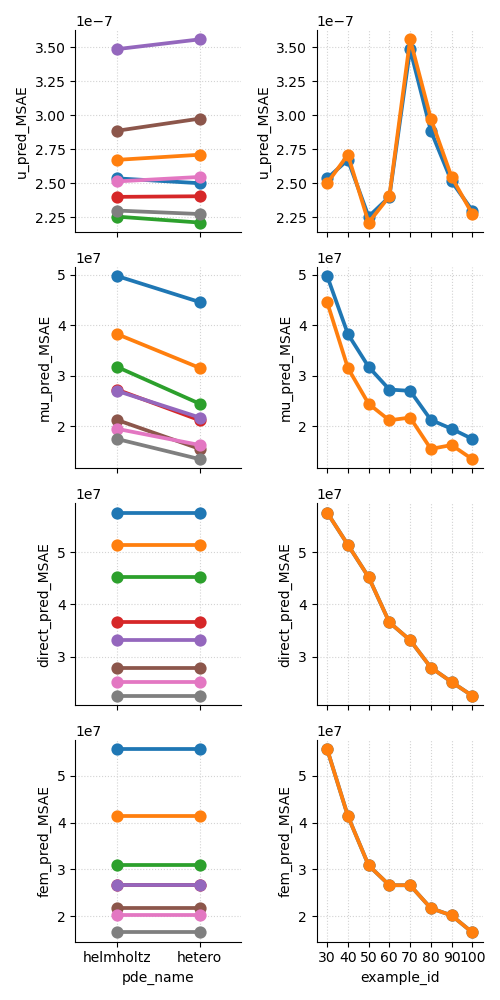

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.a

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.a

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.a

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))

  boot_dist.append(f(*sample, **func_kwargs))



In [16]:
m = metrics.reset_index()

fig = ps.plot(
    m[m.spatial_region == 'all'],
    x=param_cols,
    y=['u_pred_MSAE', 'mu_pred_MSAE', 'direct_pred_MSAE', 'fem_pred_MSAE'],
    height=2.5,
    width=2.5,
    legend=False,
    tight=True
)

In [17]:
m['method'] = 'PINN_' + m['pde_name']

direct_m = m.copy()
direct_m['method'] = 'direct_helmholtz'
for col in m.columns:
    if col.startswith('direct'):
        direct_m[col.replace('direct', 'mu')] = m[col]

fem_m = m.copy()
fem_m['method'] = 'FEM_hetero'
for col in m.columns:
    if col.startswith('fem'):
        fem_m[col.replace('fem', 'mu')] = m[col]
        
mm = pd.concat([direct_m, fem_m, m])

In [18]:
mm['mu_pred_MSAE_relative'] = mm['mu_pred_MSAE'] / mm['mu_true_MSAV']
mm['mu_pred_MAD_relative'] = mm['mu_pred_MAD'] / mm['mu_true_MAV']

In [41]:
%autoreload
import seaborn as sns
import matplotlib.pyplot as plt

colors = ps.results.get_color_palette(10, type='deep', min_val=0)
blue, orange, green, red, purple, brown, pink, gray, yellow, cyan = colors

colors = [blue, yellow, cyan, green]
sns.set_palette(colors)
colors = sns.color_palette()
colors

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196)]

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[group_name] = df[group_cols].astype(str).agg(sep.join, axis=1)



<IPython.core.display.Javascript object>


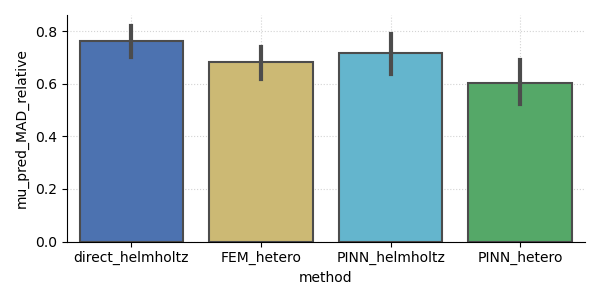

In [53]:
fig = ps.plot(
    mm[~mm.spatial_region.isin({'0', 'all'})],
    x='method',
    y='mu_pred_MAD_relative',
    height=3,
    width=6,
    legend=False,
    tight=True,
    plot_func=ps.results.barplot
)
for i, patch in enumerate(fig.axes[0].patches):
    plt.setp(patch, facecolor=colors[i])
    
for ext in ['png', 'pdf']:
    fig.savefig(f'images/phantom_method_bar_plot.{ext}', bbox_inches='tight', dpi=200)

<IPython.core.display.Javascript object>


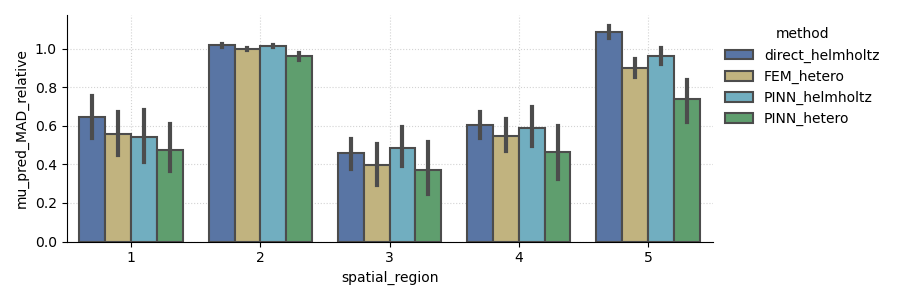

In [54]:
fig = ps.plot(
    mm[~mm.spatial_region.isin({'0', 'all'})],
    x='spatial_region',
    y='mu_pred_MAD_relative',
    hue='method',
    height=3,
    width=9,
    legend=True,
    tight=True,
    plot_func=ps.results.barplot
)

for ext in ['png', 'pdf']:
    fig.savefig(f'images/phantom_region_bar_plot.{ext}', bbox_inches='tight', dpi=200)

<IPython.core.display.Javascript object>


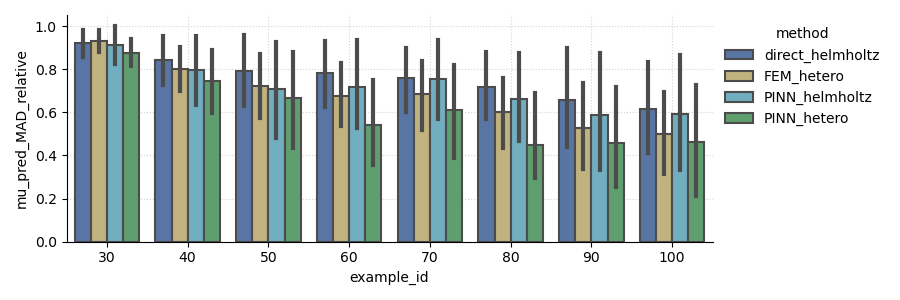

In [55]:
fig = ps.plot(
    mm[~mm.spatial_region.isin({'0', 'all'})],
    x='example_id',
    y='mu_pred_MAD_relative',
    hue='method',
    height=3,
    width=9,
    legend=True,
    tight=True,
    plot_func=ps.results.barplot
)

for ext in ['png', 'pdf']:
    fig.savefig(f'images/phantom_frequency_bar_plot.{ext}', bbox_inches='tight', dpi=200)

<IPython.core.display.Javascript object>


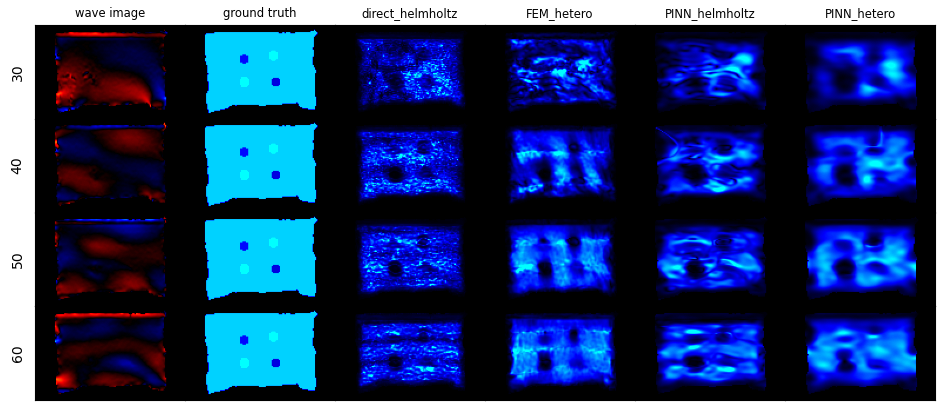

Loading ../data/BIOQIC/phantom/30/wave.nc
Loading ../data/BIOQIC/phantom/30/mre.nc
Loading ../data/BIOQIC/phantom/30/mre_mask.nc
Loading 2022-11-23_phantom_init/train_phantom_30_helmholtz/train_phantom_30_helmholtz_direct.nc
Loading 2022-11-23_phantom_init/train_phantom_30_hetero/train_phantom_30_hetero_fem.nc
Loading 2022-11-23_phantom_init/train_phantom_30_helmholtz/train_phantom_30_helmholtz_elastogram.nc
Loading 2022-11-23_phantom_init/train_phantom_30_hetero/train_phantom_30_hetero_elastogram.nc
Loading ../data/BIOQIC/phantom/40/wave.nc
Loading ../data/BIOQIC/phantom/40/mre.nc
Loading ../data/BIOQIC/phantom/40/mre_mask.nc
Loading 2022-11-23_phantom_init/train_phantom_40_helmholtz/train_phantom_40_helmholtz_direct.nc
Loading 2022-11-23_phantom_init/train_phantom_40_hetero/train_phantom_40_hetero_fem.nc
Loading 2022-11-23_phantom_init/train_phantom_40_helmholtz/train_phantom_40_helmholtz_elastogram.nc
Loading 2022-11-23_phantom_init/train_phantom_40_hetero/train_phantom_40_hetero_el

<IPython.core.display.Javascript object>


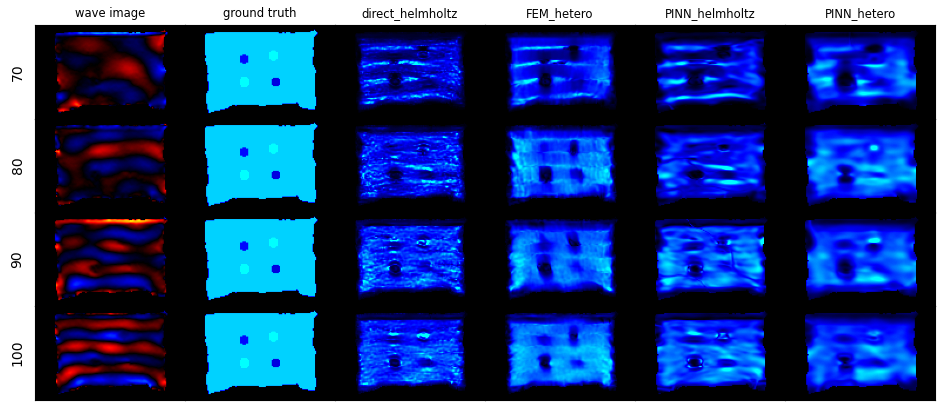

Loading ../data/BIOQIC/phantom/70/wave.nc
Loading ../data/BIOQIC/phantom/70/mre.nc
Loading ../data/BIOQIC/phantom/70/mre_mask.nc
Loading 2022-11-23_phantom_init/train_phantom_70_helmholtz/train_phantom_70_helmholtz_direct.nc
Loading 2022-11-23_phantom_init/train_phantom_70_hetero/train_phantom_70_hetero_fem.nc
Loading 2022-11-23_phantom_init/train_phantom_70_helmholtz/train_phantom_70_helmholtz_elastogram.nc
Loading 2022-11-23_phantom_init/train_phantom_70_hetero/train_phantom_70_hetero_elastogram.nc
Loading ../data/BIOQIC/phantom/80/wave.nc
Loading ../data/BIOQIC/phantom/80/mre.nc
Loading ../data/BIOQIC/phantom/80/mre_mask.nc
Loading 2022-11-23_phantom_init/train_phantom_80_helmholtz/train_phantom_80_helmholtz_direct.nc
Loading 2022-11-23_phantom_init/train_phantom_80_hetero/train_phantom_80_hetero_fem.nc
Loading 2022-11-23_phantom_init/train_phantom_80_helmholtz/train_phantom_80_helmholtz_elastogram.nc
Loading 2022-11-23_phantom_init/train_phantom_80_hetero/train_phantom_80_hetero_el

In [56]:
%autoreload
import mre_pinn

image_names = ['wave image', 'ground truth', 'direct_helmholtz', 'FEM_hetero', 'PINN_helmholtz', 'PINN_hetero']

def plot_image_grid(example_ids):
    n_rows = len(example_ids)
    n_cols = len(image_names)
    ax_width = 1.5
    ax_height = ax_width * 80 / 128

    fig, axes, cbar_ax = mre_pinn.visual.subplot_grid(n_rows, n_cols, ax_height, ax_width, space=0, pad=(0.35,0.15,0.15,0.25))
    for row_idx, example_id in enumerate(example_ids):
        example = mre_pinn.data.MREExample.load_xarrays('../data/BIOQIC/phantom', example_id)
        for col_idx, image_name in enumerate(image_names):
            ax = axes[row_idx,col_idx]
            #ax.text(0.1, 0.1, f'{row_idx}, {col_idx}')
            if col_idx == 0:
                ax.set_ylabel(example_id, fontsize='medium')
            if row_idx == 0:
                ax.set_title(image_name, fontsize='small')
            ax.set_yticks([])
            ax.set_xticks([])

            if image_name == 'wave image':
                array = example.wave.sel(component='z')[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = array.real * (example.mre_mask.values[...,0] > 0)

            elif image_name == 'ground truth':
                array = example.mre[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'direct_helmholtz':
                nc_file = f'2022-11-23_phantom_init/train_phantom_{example_id}_helmholtz/train_phantom_{example_id}_helmholtz_direct.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='direct_pred')[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'FEM_hetero':
                nc_file = f'2022-11-23_phantom_init/train_phantom_{example_id}_hetero/train_phantom_{example_id}_hetero_fem.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='fem_pred')[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'PINN_helmholtz':
                nc_file = f'2022-11-23_phantom_init/train_phantom_{example_id}_helmholtz/train_phantom_{example_id}_helmholtz_elastogram.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='mu_pred')[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            elif image_name == 'PINN_hetero':
                nc_file = f'2022-11-23_phantom_init/train_phantom_{example_id}_hetero/train_phantom_{example_id}_hetero_elastogram.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='mu_pred')[...,0]
                color_kws = mre_pinn.visual.get_color_kws(array)
                color_kws['vmin'] = -color_kws['vmax']
                array = np.abs(array)

            mre_pinn.visual.imshow(ax, array, **color_kws)
    return fig

fig0 = plot_image_grid(['30', '40', '50', '60'])
fig1 = plot_image_grid(['70', '80', '90', '100'])

for ext in ['png', 'pdf']:
    fig0.savefig(f'images/phantom_example_grid0.{ext}', bbox_inches='tight', dpi=200)
    fig1.savefig(f'images/phantom_example_grid1.{ext}', bbox_inches='tight', dpi=200)